# Ideal Lowpass Filter

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [47]:
def ideal_lpf_gray(img, cutoff, pad_size=10):
    """grayscale 이미지에 대해 패딩한 후 ideal lpf를 적용하는 함수

    Args:
        img (2D numpy array): 그레이스케일 이미지
        cutoff (real): 필터 반지름
        pad_size (int, optional): 패딩 크기
    """
    padded_img = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, borderType=cv2.BORDER_CONSTANT, value=0)

    f = np.fft.fft2(padded_img) # 푸리에 변환
    fs = np.fft.fftshift(f) # 중앙으로 주파수 성분 재배열
    
    # build lpf mask
    M, N = padded_img.shape
    center_x, center_y = M//2, N//2
    lpf = np.zeros((M,N), dtype=np.float32)
    
    for i in range(M):
        for j in range(N):
            if np.sqrt((i-center_x)**2 + (j-center_y)**2) <= cutoff:
                lpf[i, j] = 1
    
    f_ = fs * lpf # 필터적용
    
    inv = np.fft.ifftshift(f_)  # 중앙에 배치되어있던 배열 복원
    inv_img = np.fft.ifft2(inv) # 역푸리에 변환
    inv_img = np.abs(inv_img)   # 실수값으로 변환
    
    return inv_img[pad_size:-pad_size, pad_size:-pad_size]

In [3]:
def ideal_lpf_rgb(img, cutoff, pad_size=10):
    """idela_lpf_gray를 이용해 rgb이미지를 필터링

    Args:
        img (3D numpy array): color image (BGR)
        cutoff (real)
        pad_size (int, optional)
    """
    b, g, r = cv2.split(img) # OpenCV는 bgr순서
    
    b_ = ideal_lpf_gray(b, cutoff, pad_size=pad_size)
    g_ = ideal_lpf_gray(g, cutoff, pad_size=pad_size)
    r_ = ideal_lpf_gray(r, cutoff, pad_size=pad_size)
    
    return cv2.merge([b_, g_, r_])

In [69]:
def show_spectrum(img):
    """주어진 이미지의 주파수 성분을 도시함

    Args:
        img (numpy array): grayscale/RGB image
    """

    if img.ndim == 3:
        height, width, _= img.shape
        channels = cv2.split(img)       # 채널별 분리
        names = ['R', 'G', 'B']
        fig, axes = plt.subplots(1, 3)
        for i, channel in enumerate(channels):
            # 각 채널에 대해 2차원 FFT 수행
            f = np.fft.fft2(channel)
            # 중심부에 주파수 성분이 오도록 shift 적용
            fshift = np.fft.fftshift(f)
            # 로그 스케일을 적용하여 시각화를 용이하게 함
            spectrum = 20 * np.log(np.abs(fshift) + 1)
            axes[i].imshow(spectrum, cmap='gray')
            axes[i].set_title(f'{names[i]} channel')
            axes[i].axis('on')
            axes[i].set_xticks([0, width - 1])
            axes[i].set_yticks([0, height - 1])
        plt.tight_layout()
        plt.show()
            
        
    else:
        height, width, = img.shape
        f = np.fft.fft2(img)
        spectrum = np.log(np.abs(f))
        plt.imshow(np.fft.fftshift(spectrum), cmap = 'gray')
        plt.xticks([0, width - 1])
        plt.yticks([0, height - 1])
        plt.show()

### test image (rgb)

In [81]:
img_path = '/Users/jeonhyeonbin/Documents/CSED551/assn1/assn2/images/cat.jpg'

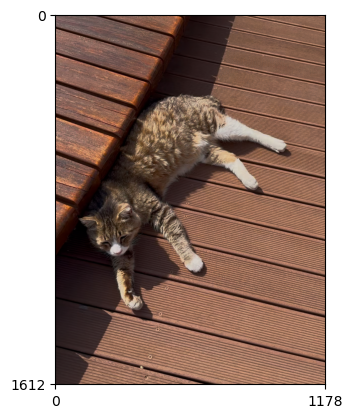

In [96]:
img = cv2.imread(img_path, cv2.IMREAD_COLOR).astype(np.float32)/255.       # RGB
#img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE).astype(np.float32)/255.    # grayscale

# RGB
height, width, _= img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# grayscale
#height, width = img.shape
#plt.imshow(img, cmap='gray')

# plot
plt.xticks([0, width-1])
plt.yticks([0, height-1])
plt.show()

### Visualization of Fourier transform of an example input image

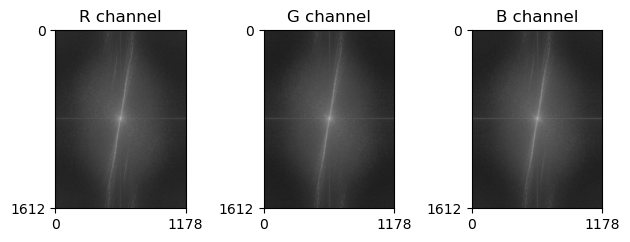

In [97]:
show_spectrum(img)

### Visualization of Fourier transform of an ideal lowpass filter

In [98]:
cutoff = 200

In [102]:
def show_filter_shape(img, cutoff, pad_size=10):
    padded_img = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, borderType=cv2.BORDER_CONSTANT, value=0)
    
    padded_img = cv2.cvtColor(padded_img, cv2.COLOR_BGR2GRAY)
    
    # build lpf mask
    M, N = padded_img.shape
    center_x, center_y = M//2, N//2
    lpf = np.zeros((M,N), dtype=np.float32)
    
    for i in range(M):
        for j in range(N):
            if np.sqrt((i-center_x)**2 + (j-center_y)**2) <= cutoff:
                lpf[i, j] = 1
    
    plt.imshow(lpf, cmap='gray')


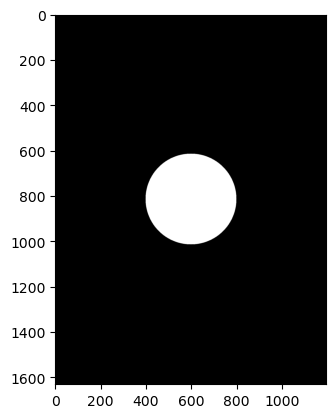

In [103]:
show_filter_shape(img, cutoff, pad_size=9)

### Visualization of Fourier transform of a filtering result in the frequency domain

In [89]:
pad_size = 5

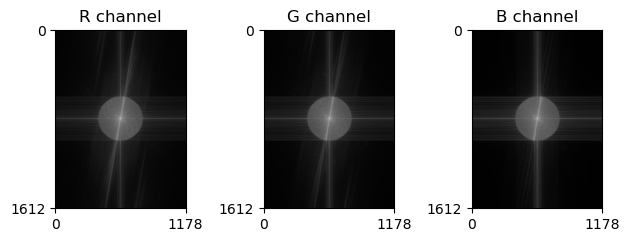

In [105]:
rgb_filtered = ideal_lpf_rgb(img, cutoff, pad_size=pad_size)

show_spectrum(rgb_filtered)